# Range-Doppler Image Classification Using Convolutional Neural Network and Pre-trained Networks Trained to ImageNet Dataset 
## Nome: Rodrigo de Lima Florindo
## Matrícula: 101809

Notes:
- For properly running this project, you need to manually download this dataset: "https://www.kaggle.com/datasets/iroldan/real-doppler-raddar-database/discussion/568518", unzip it in a folder named "dataset" inside Projeto 4 folder, and manually delete the "data" folder that is inside the unzipped folder. For some reasone, "data" is just a duplicate that is there for now reason.

In [ ]:
import kagglehub
from pathlib import Path
import numpy as np # linear algebra
import matplotlib.pyplot as plt # graph plotting
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# Input data files are available in the read-only "../input/" directory

# Download latest version
root = Path("dataset")

CLASS = {'Cars':0, 'Drones': 1, 'People':2}

# find all CSVs whose parent-dir is a known class
files = [p for p in root.rglob("*.csv") if p.parent.parent.name in CLASS]

# read
imgs  = [pd.read_csv(p, header=None).to_numpy() for p in files]
labels = np.fromiter((CLASS[p.parent.name] for p in files), dtype=np.int64)
paths  = np.array([str(p.relative_to(root)) for p in files])

# if all images are same shape, stack to one array (faster & smaller)
x = np.stack(imgs).astype(np.float32)   # (N, H, W)
y = labels
d = paths

print(len(files), "files loaded.")

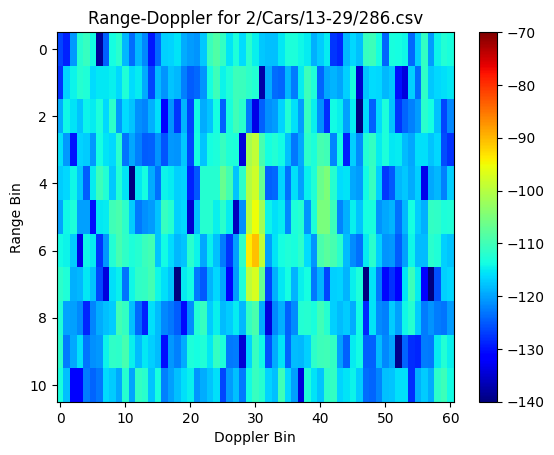

In [11]:
fig = plt.figure()
ax = plt.axes()
img = ax.imshow(list_of_img[4], vmin=-140, vmax=-70, cmap='jet')
plt.title('Range-Doppler for {}'.format(list_of_file[4]))
plt.axis('tight')
plt.ylabel('Range Bin')
plt.xlabel('Doppler Bin')
plt.colorbar(img)
plt.show()